In [ ]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

box_DIR = "../data/box/"
img_DIR_T = "../data/images/teams/"
fig_DIR = "../figs/teams/"

In [93]:
seasons = np.arange(2015,2025)
df1 = get_box(PT="T",measure="Base",cum=True,seasons=seasons)
df1["mid"] = np.where((df1["w_pct"]>=0.45) & (df1["w_pct"]<=0.55),1,0)
# df1["mid"] = np.where((df1["w_pct"]>=0.475) & (df1["w_pct"]<=0.525),1,0)

In [ ]:
teams = df1["team_name"].unique()
teams

In [ ]:
data = df1.copy()
team = 'Philadelphia 76ers'
data = data.query(f"team_name == '{team}'")
p = (
    ggplot(data)
    + aes(x="season",y="w_pct")
    + geom_point(size=1.5)
    + geom_line(size=1.2)
    # + geom_hline(yintercept=0.5)
    + geom_hline(yintercept=0.48)
    + geom_hline(yintercept=0.52)
    # + geom_text(aes(label="w_pct"),size=8)
    + scale_y_continuous(labels=percent_format())
    + scale_x_continuous(breaks=range(2016,2026,2))
    + theme_idv
    + theme(
        # figure_size=(8,5)
    )
    + labs(
        title=f"{team} Win %",
        subtitle="Last 10 seasons",
        x="Season",
        y="Win %",
        caption="bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats"
    )
)
p

## Mid Teams

In [ ]:
df2 = df1.groupby(["team_name"])[["mid"]].sum()
df2 = df2.reset_index().sort_values("mid",ascending=False).reset_index(drop=True).reset_index()
teams2 = df2["team_name"].to_list()
teams2.reverse()
df_teams = pd.read_csv("../data/" + "NBA_teams_colors_logos.csv")
df_teams["team_name"] = df_teams["nameTeam"]
df_teams = df_teams[["team_name","colorsTeam"]]
df3 = pd.merge(df2,df_teams)
df3["team_name"] = pd.Categorical(df3["team_name"],categories=teams2,ordered=True)

In [ ]:
pnba = labs(
    caption="bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats",
)

In [ ]:

p = (
    ggplot(df3)
    + aes(x="team_name",y="mid",fill="colorsTeam")
    + geom_col(alpha=0.75,show_legend=False)
    + coord_flip()
    + scale_color_identity(aesthetics=["fill"])
    + theme_idv
    + labs(
        x="Seasons",
        y="",
        title="Number of Mid Seasons over the past 10 years",
        subtitle="Mid: Win % between 45 and 55. Corresponds to 37-45 wins in 82 game season",
        # subtitle="Mid: Win % between 47.5 and 52.5. Corresponds to 39-43 wins in 82 game season",
    )
    + pnba
    + theme(
        figure_size=(8,10)
    )
)
p

## Players on Mid Teams

In [96]:
seasons = np.arange(2015,2025)
df1 = get_box(PT="P",measure="Base",cum=True,seasons=seasons)
df1["mid"] = np.where((df1["w_pct"]>=0.45) & (df1["w_pct"]<=0.55),1,0)

In [97]:
df1.columns

Index(['player_id', 'player_name', 'nickname', 'team_id', 'team_abbreviation',
       'age', 'gp', 'w', 'l', 'w_pct', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m',
       'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast',
       'tov', 'stl', 'blk', 'blka', 'pf', 'pfd', 'pts', 'plus_minus', 'season',
       'mid'],
      dtype='object')

In [102]:
df2

,index,player_id,player_name,mid
0,0,203991,Clint Capela,6
1,1,1627742,Brandon Ingram,5
2,2,1626167,Myles Turner,5
3,3,1628389,Bam Adebayo,5
4,4,203078,Bradley Beal,5
...,...,...,...,...
1444,1444,1628402,Frank Jackson,0
1445,1445,1628409,Alec Peters,0
1446,1446,1628412,Frank Mason III,0
1447,1447,1628416,Tyler Dorsey,0


In [103]:
df2 = df1.groupby(["player_id","player_name"])[["mid"]].sum()
df2 = df2.reset_index().sort_values("mid",ascending=False).reset_index(drop=True).reset_index()
players = df2["player_name"].to_list()
players.reverse()
df2["player_name"] = pd.Categorical(df2["player_name"],categories=players,ordered=True)

In [111]:
df2.head(12)

,index,player_id,player_name,mid
0,0,203991,Clint Capela,6
1,1,1627742,Brandon Ingram,5
2,2,1626167,Myles Turner,5
3,3,1628389,Bam Adebayo,5
4,4,203078,Bradley Beal,5
5,5,203083,Andre Drummond,5
6,6,203486,Mason Plumlee,5
7,7,1627884,Derrick Jones Jr.,5
8,8,1626159,Justise Winslow,5
9,9,202704,Reggie Jackson,5


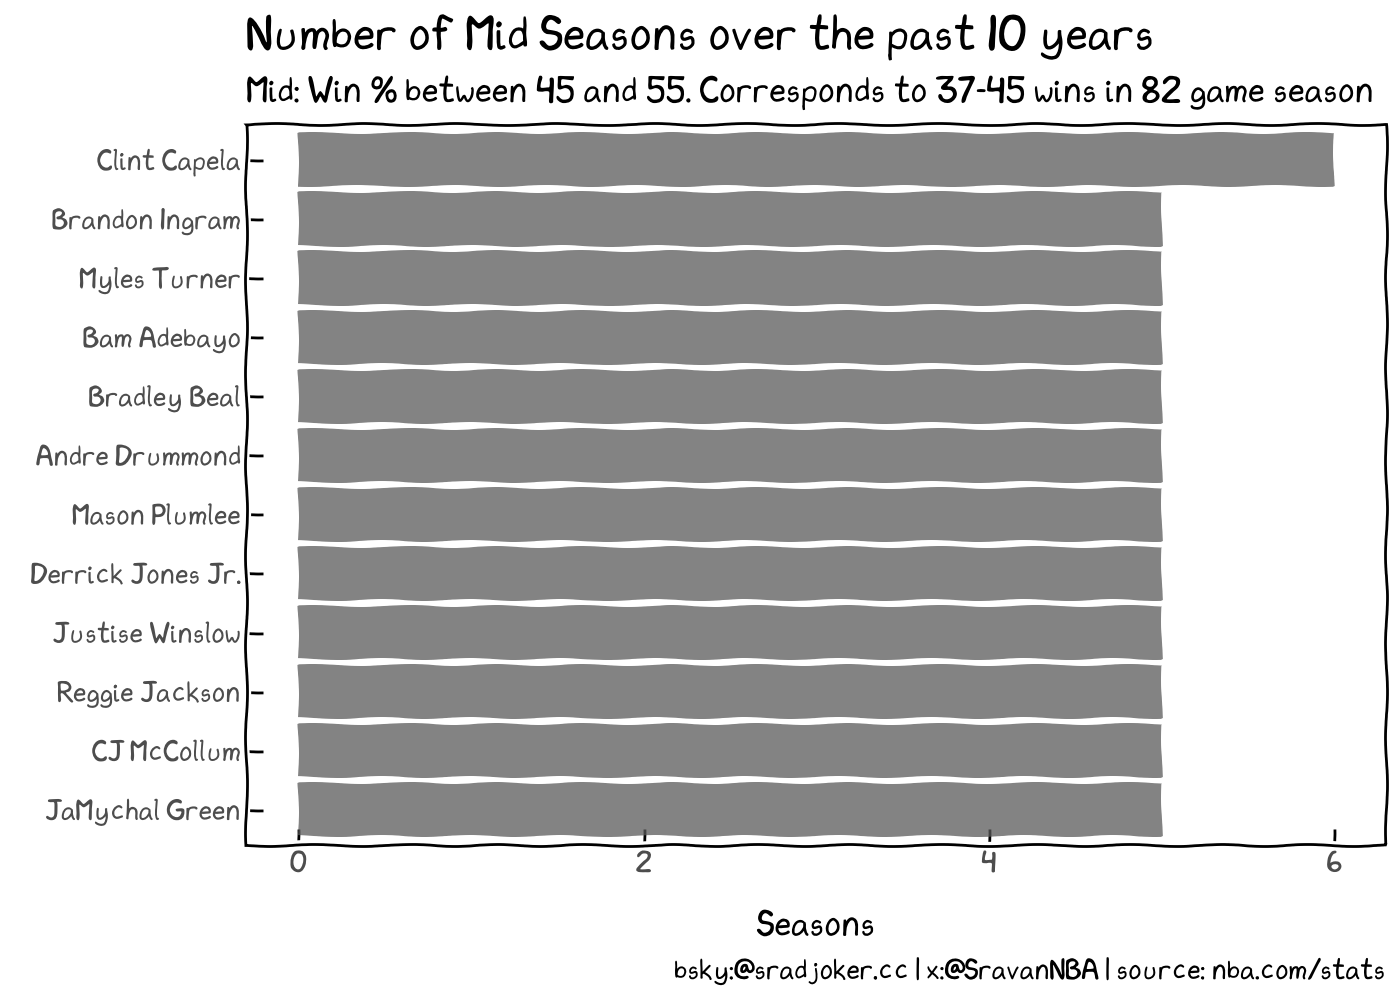

In [115]:
data = df2.head(12)
p = (
    ggplot(data)
    + aes(x="player_name",y="mid")
    + geom_col(alpha=0.75,show_legend=False)
    + coord_flip()
    + theme_idv
    + labs(
        x="",
        y="Seasons",
        title="Number of Mid Seasons over the past 10 years",
        subtitle="Mid: Win % between 45 and 55. Corresponds to 37-45 wins in 82 game season",
        # subtitle="Mid: Win % between 47.5 and 52.5. Corresponds to 39-43 wins in 82 game season",
    )
    + pnba
    + theme(
        figure_size=(7,5)
    )
)
p